<a href="https://colab.research.google.com/github/rameenhamad/Developer_HUB_ML_Tasks/blob/main/2_Cancer_Detection_Histopathological_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt

DataSet

In [4]:
dataset = "/content/drive/MyDrive/Developer_HUB_ML_Tasks/Cancer_Histopathological"
train_dataset = os.path.join(dataset, "train")
test_dataset = os.path.join(dataset, "test")


Resizing + Normalization(Preprocessing)

In [5]:
ImageSize = (128,128)
BatchSize = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = 0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='training'
)

val_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary'
)

print("classes: ", train_generator.class_indices)

Found 527 images belonging to 2 classes.
Found 131 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
classes:  {'benign': 0, 'malignant': 1}


inside the dataSet

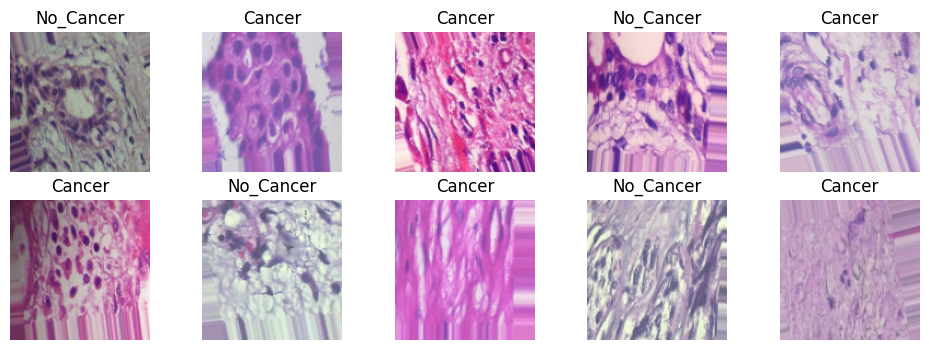

In [6]:
def plot_images(generator):
  images,labels = next(generator)
  plt.figure(figsize=(12,4))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title("Cancer" if labels[i] == 1 else "No_Cancer")
    plt.axis("off")
  plt.show()

plot_images(train_generator)

Building model with 3 convo layers

In [7]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       663,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,393 (2.62 MB)

 Trainable params: 687,393 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 - 22s - 1s/step - accuracy: 0.6793 - loss: 0.5878 - val_accuracy: 0.9008 - val_loss: 0.4314
Epoch 2/10
17/17 - 13s - 759ms/step - accuracy: 0.8197 - loss: 0.4595 - val_accuracy: 0.9008 - val_loss: 0.3617
Epoch 3/10
17/17 - 13s - 754ms/step - accuracy: 0.8539 - loss: 0.4009 - val_accuracy: 0.8473 - val_loss: 0.3417
Epoch 4/10
17/17 - 13s - 755ms/step - accuracy: 0.8330 - loss: 0.4225 - val_accuracy: 0.7786 - val_loss: 0.4101
Epoch 5/10
17/17 - 13s - 754ms/step - accuracy: 0.8330 - loss: 0.4074 - val_accuracy: 0.9389 - val_loss: 0.2937
Epoch 6/10
17/17 - 13s - 759ms/step - accuracy: 0.8748 - loss: 0.3485 - val_accuracy: 0.8473 - val_loss: 0.3230
Epoch 7/10
17/17 - 13s - 766ms/step - accuracy: 0.8596 - loss: 0.3639 - val_accuracy: 0.9237 - val_loss: 0.2581
Epoch 8/10
17/17 - 13s - 747ms/step - accuracy: 0.8748 - loss: 0.3639 - val_accuracy: 0.7481 - val_loss: 0.4738
Epoch 9/10
17/17 - 13s - 765ms/step - accuracy: 0.8159 - loss: 0.4359 - val_accuracy: 0.9160 - val_loss: 0.

Evaluating Test_data

In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

10/10 - 5s - 454ms/step - accuracy: 0.8133 - loss: 0.4171
Test Accuracy: 0.8133, Test Loss: 0.4171


Accuracy / Loss plot

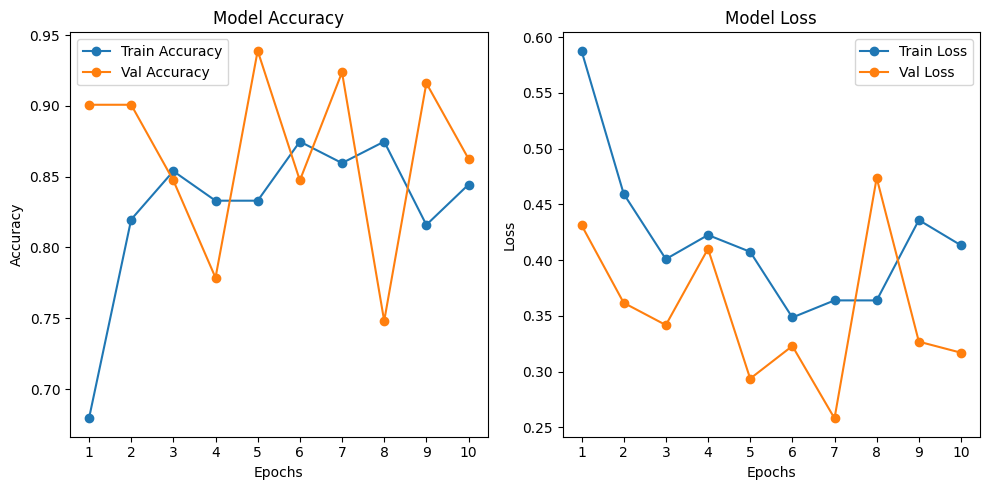

In [17]:
def plot_training_history(history):
    # Create a figure with 2 subplots: accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_training_history(history)

##**Quick Observations**

###Accuracy and loss behavior

**Training accuracy:**
Starts around 60% → increases to ~86% by epoch 10 → model is learning.

**Training loss:**
Starts at 0.68 → decreases to 0.3887 → loss is decreasing, which is good.

**Validation accuracy:**
Fluctuates between 58% → 84.7%.
Some fluctuations indicate small dataset / overfitting.

**Validation loss:**
Starts at 0.5679 → decreases to 0.3569 → overall improving, but still fluctuates.

Transfer Learning with VGG16

In [11]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

transfer_model = Sequential([
    base_model,

    MaxPooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
transfer_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
transfer_history = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/10
17/17 - 29s - 2s/step - accuracy: 0.5844 - loss: 0.7039 - val_accuracy: 0.6107 - val_loss: 0.6954
Epoch 2/10
17/17 - 14s - 794ms/step - accuracy: 0.6945 - loss: 0.5904 - val_accuracy: 0.6031 - val_loss: 0.7199
Epoch 3/10
17/17 - 13s - 781ms/step - accuracy: 0.7211 - loss: 0.5516 - val_accuracy: 0.4733 - val_loss: 0.7447
Epoch 4/10
17/17 - 13s - 786ms/step - accuracy: 0.7875 - loss: 0.4865 - val_accuracy: 0.4733 - val_loss: 0.7754
Epoch 5/10
17/17 - 21s - 1s/step - accuracy: 0.7989 - loss: 0.4682 - val_accuracy: 0.5115 - val_loss: 0.8157
Epoch 6/10
17/17 - 13s - 792ms/step - accuracy: 0.7780 - loss: 0.4424 - val_accuracy: 0.5496 - val_loss: 0.8473
Epoch 7/10
17/17 - 20s - 1s/step - accuracy: 0.8368 - loss: 0.4273 - val_accuracy: 0.5649 - val_loss: 0.8474
Epoch 8/10
17/17 - 13s - 784ms/step - accuracy: 0.8121 - loss: 0.4416 - val_accuracy: 0.5725 - val_loss: 0.8510
Epoch 9/10
17/17 - 13s - 784ms/step - accuracy: 0.7970 - loss: 0.4440 - val_accuracy: 0.5344 - val_loss: 0.8126
E

Evaluating Test_data

In [20]:
test_loss, test_accuracy = transfer_model.evaluate(test_generator, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7800, Test Loss: 0.4994


plot for transfer model accuracy / loss

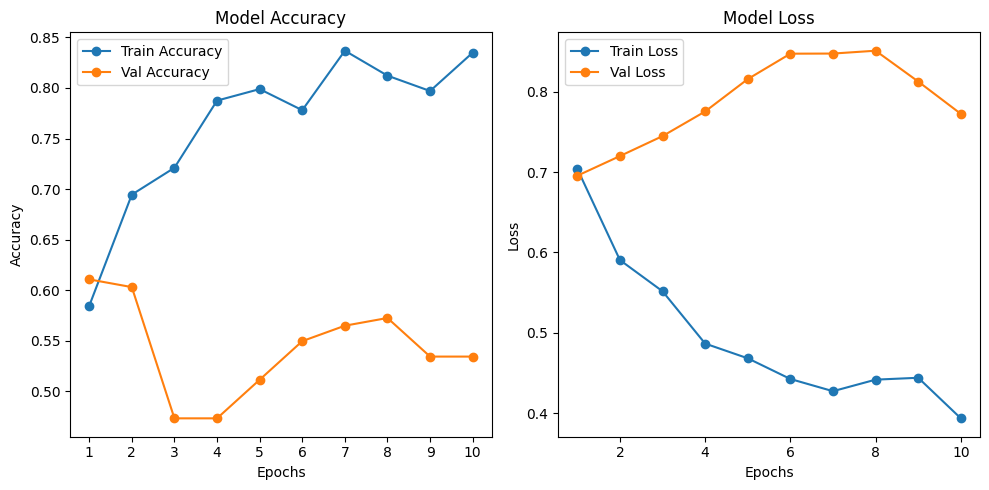

In [16]:
def plot_training_history(transfer_history):
    # Create a figure with 2 subplots: accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    epochs = range(1, len(transfer_history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, transfer_history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, transfer_history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, transfer_history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, transfer_history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_training_history(transfer_history)

##**Observations**

**Training accuracy:**
Starts at 55% → improves to 87.1% → your model is learning features.

**Training loss:**
Drops from 0.9173 → 0.3075 → consistent improvement.

**Validation accuracy:**
Fluctuates around 50–64% → not improving as much as training accuracy.

- This is a sign of overfitting: model memorizes training data but doesn’t generalize well.

**Validation loss:**
Fluctuates around 0.68–0.89 → confirms instability / overfitting.

**Why this happens with VGG16**
- VGG16 is very deep → lots of parameters (~138M in full model).
- Your dataset is small (~500–1000 images) → not enough to train such a big model from scratch.
- Even if freeze convolutional layers and only train dense layers, overfitting can still happen.

##Final Thoughts